SUMMARY

Country_wide_COVID 19_Datasets 

Content

The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18, and also contains the population of each country to calculate per-capita penetration of the virus

Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added (taken from Wikipedia). This is specifically relevant since COVID-19 death rate is very much age dependent.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cc=pd.read_csv('/Users/drram/Documents/worldometer_snapshots_April18_to_May18.csv')
cc.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [3]:
cc_age=pd.read_csv('/Users/drram/Documents/population_structure_by_age_per_contry.csv')
cc_age.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [4]:
print(cc.shape)
print("\n")
print(cc_age.shape)

(6603, 9)


(213, 4)


In [5]:
print(cc.info())
print("\n")
print(cc_age.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   213 non-null    object 
 1  

In [6]:
print(cc.dtypes)
print("\n")
print(cc_age.dtypes)

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object


Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object


Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64




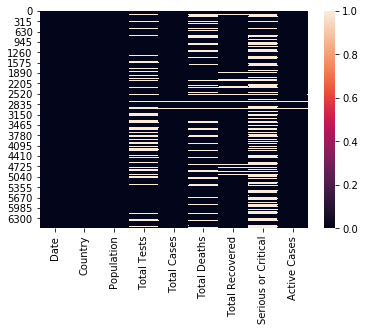

In [7]:
print(cc.isnull().sum())
print("\n")
sns.heatmap(cc.isnull())

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64




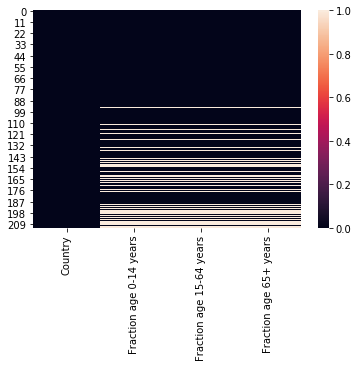

In [8]:
print(cc_age.isnull().sum())
print("\n")
sns.heatmap(cc_age.isnull())

#### filliing of Missing values in the dataset

In [9]:
cc.sort_values(by=['Country','Date'])

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
52,2020-04-18,Afghanistan,38817349,NaN,933.0,30.0,112.0,NaN,791.0
265,2020-04-19,Afghanistan,38817349,6422.0,996.0,33.0,131.0,7.0,832.0
478,2020-04-20,Afghanistan,38817349,6422.0,1026.0,36.0,135.0,7.0,855.0
691,2020-04-21,Afghanistan,38817349,6422.0,1092.0,36.0,150.0,7.0,906.0
904,2020-04-22,Afghanistan,38817349,6422.0,1176.0,40.0,166.0,7.0,970.0
...,...,...,...,...,...,...,...,...,...
5713,2020-05-14,Zimbabwe,14836491,36081.0,37.0,4.0,13.0,NaN,20.0
5926,2020-05-15,Zimbabwe,14836491,25478.0,42.0,4.0,13.0,NaN,25.0
6139,2020-05-16,Zimbabwe,14836491,25478.0,42.0,4.0,13.0,NaN,25.0
6352,2020-05-17,Zimbabwe,14836491,27059.0,44.0,4.0,17.0,NaN,23.0


In [10]:
# replacing Total Recovered null values in the columns with zero
cc['Total Deaths']=cc['Total Deaths'].fillna(0)
cc['Serious or Critical']=cc['Serious or Critical'].fillna(0)
cc['Active Cases']=cc['Active Cases'].fillna(0)
cc['Total Cases']=cc['Total Cases'].fillna(0)
cc['Total Recovered']=cc['Total Recovered'].fillna(0)

In [11]:
##The average global tests where no information is available
cc['Total Tests']=cc['Total Tests'].fillna(cc['Total Cases']*10)

In [12]:
cc.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [15]:
# changing the datatype of the date column
pd.to_datetime(cc['Date'])

0      2020-04-18
1      2020-04-18
2      2020-04-18
3      2020-04-18
4      2020-04-18
          ...    
6598   2020-05-18
6599   2020-05-18
6600   2020-05-18
6601   2020-05-18
6602   2020-05-18
Name: Date, Length: 6603, dtype: datetime64[ns]

In [16]:
# checking the rows where there are null values
#ccage dataframe
cc_age[cc_age.isnull().any(axis=1)]

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
95,Mayotte,NaN,NaN,NaN
112,Andorra,NaN,NaN,NaN
117,San Marino,NaN,NaN,NaN
121,Channel Islands,NaN,NaN,NaN
127,Réunion,NaN,NaN,NaN
134,Isle of Man,NaN,NaN,NaN
137,Cabo Verde,NaN,NaN,NaN
145,Sao Tome and Principe,NaN,NaN,NaN
147,French Guiana,NaN,NaN,NaN
149,Martinique,NaN,NaN,NaN


In [17]:
cc_age.dtypes

Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [18]:
cc_age['Fraction age 0-14 years']=cc_age['Fraction age 0-14 years'].fillna(cc_age['Fraction age 0-14 years'].mean())
cc_age['Fraction age 15-64 years']=cc_age['Fraction age 15-64 years'].fillna(cc_age['Fraction age 15-64 years'].mean())
cc_age['Fraction age 65+ years']=cc_age['Fraction age 65+ years'].fillna(cc_age['Fraction age 65+ years'].mean())

In [19]:
cc_age.isnull().sum()

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [20]:
cc.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0


In [21]:
cc_age.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [22]:
cc1=pd.merge(cc,cc_age,on='Country')

In [23]:
cc1.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154


In [24]:
cc1.isnull().sum()

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

#checking the distribution of the data
#Univariate Analysis

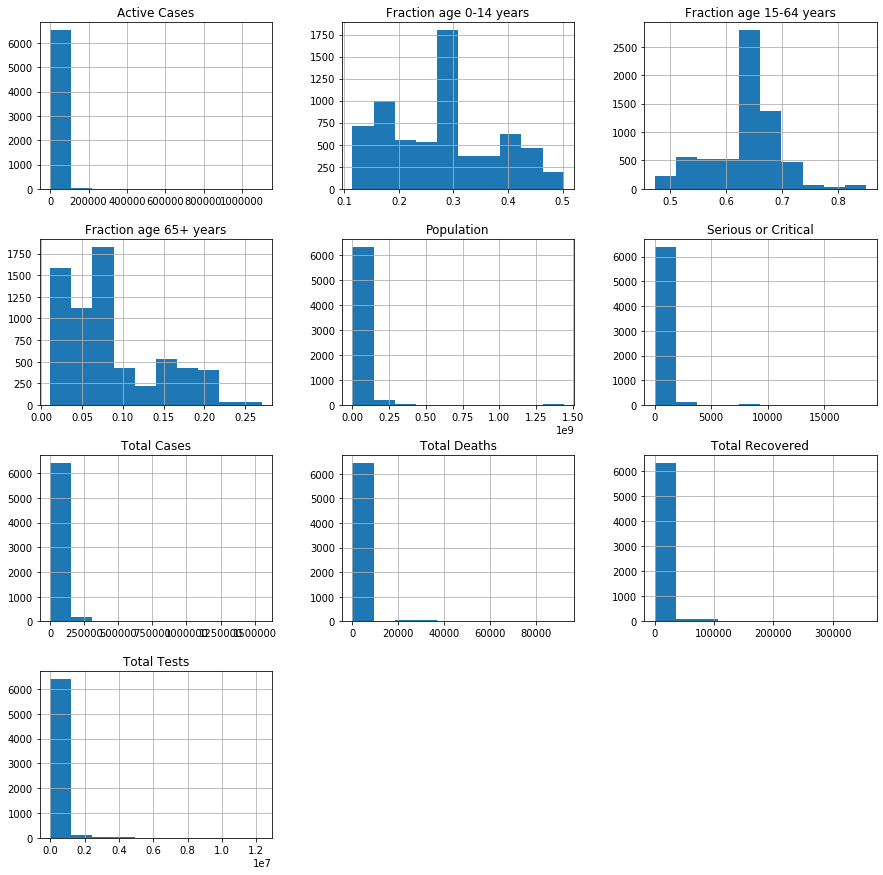

In [25]:
cc1.hist(figsize=(15,15))
plt.show()



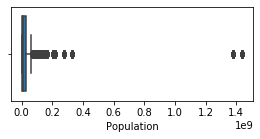

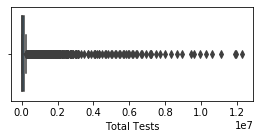

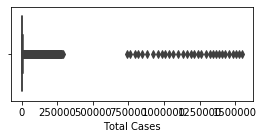

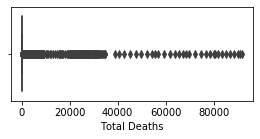

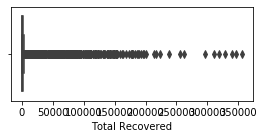

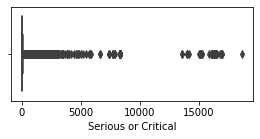

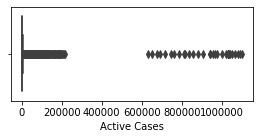

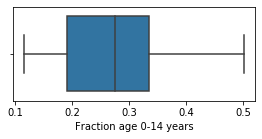

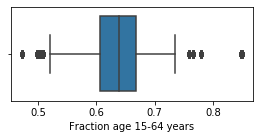

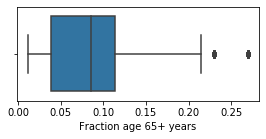

In [26]:
#checking the outliers in the data
for i in cc1.columns:
    if cc1[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(cc1[i])

observation-

There are so many outliers seen in most pf the columns

### Statistical Analysis

In [28]:
cc1.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03,6603.000000,6603.000000,6603.000000
mean,3.637913e+07,1.850955e+05,1.680405e+04,1151.147206,5602.691201,241.139331,9.875109e+03,0.276098,0.636109,0.087731
std,1.411537e+08,6.993230e+05,8.829716e+04,6016.411612,22986.345036,1322.814259,6.512407e+04,0.096766,0.060320,0.056676
min,8.010000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.115000,0.472000,0.011000
25%,8.672680e+05,1.480000e+03,7.600000e+01,1.000000,17.000000,0.000000,2.500000e+01,0.191000,0.607000,0.038000
50%,6.859926e+06,1.246100e+04,5.940000e+02,11.000000,183.000000,2.000000,2.600000e+02,0.276098,0.638000,0.085000
75%,2.546422e+07,1.066180e+05,4.757000e+03,109.000000,1302.500000,27.000000,1.991000e+03,0.335000,0.667000,0.114000
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,0.502000,0.850000,0.270000


In [29]:
cc1.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Population,1.000000,0.271429,0.226144,0.184892,0.310775,0.172346,0.179594,-0.039630,0.071066,-0.007319
Total Tests,0.271429,1.000000,0.901019,0.814127,0.811324,0.743657,0.852952,-0.236477,0.141288,0.254213
Total Cases,0.226144,0.901019,1.000000,0.935250,0.818957,0.892289,0.975015,-0.170559,0.077322,0.209443
Total Deaths,0.184892,0.814127,0.935250,1.000000,0.795902,0.833374,0.881876,-0.190062,0.050604,0.271012
Total Recovered,0.310775,0.811324,0.818957,0.795902,1.000000,0.723509,0.685120,-0.227488,0.120723,0.260946
Serious or Critical,0.172346,0.743657,0.892289,0.833374,0.723509,1.000000,0.875839,-0.160810,0.085802,0.183707
Active Cases,0.179594,0.852952,0.975015,0.881876,0.685120,0.875839,1.000000,-0.130525,0.057477,0.162003
Fraction age 0-14 years,-0.039630,-0.236477,-0.170559,-0.190062,-0.227488,-0.160810,-0.130525,1.000000,-0.839259,-0.815133
Fraction age 15-64 years,0.071066,0.141288,0.077322,0.050604,0.120723,0.085802,0.057477,-0.839259,1.000000,0.369285
Fraction age 65+ years,-0.007319,0.254213,0.209443,0.271012,0.260946,0.183707,0.162003,-0.815133,0.369285,1.000000


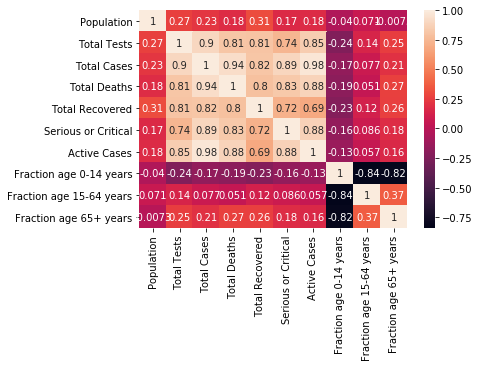

In [30]:
sns.heatmap(cc1.corr(), annot=True)

Observations
1. Total tests, total cases, total deaths, total recovered, serious critical and active cases are positively correlated with each other.

In [31]:
#Using Labelencoder to encode the categorical variables
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
cc1['Date']=lb.fit_transform(cc1['Date'])
cc1['Country']=lb.fit_transform(cc1['Country'])

removing outliers

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(cc1))
print("The datashape before removing outliers is ", cc1.shape)
cc1=cc1[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", cc1.shape)

The datashape before removing outliers is  (6603, 12)
The datashape after removing outliers is  (6179, 12)


### checking the skewness

In [33]:
cc1.skew()

Date                        0.008281
Country                     0.001664
Population                  4.019423
Total Tests                 4.565916
Total Cases                 5.357714
Total Deaths                8.750894
Total Recovered             7.276211
Serious or Critical         9.555351
Active Cases                6.402657
Fraction age 0-14 years     0.333146
Fraction age 15-64 years   -0.512521
Fraction age 65+ years      0.831507
dtype: float64

In [34]:
#using log1p method to remove the skewness
for i in cc1.columns:
    if cc1.skew()[i]>0.55:
        cc1[i]=np.log1p(cc1[i])

In [35]:
cc1.skew()

Date                        0.008281
Country                     0.001664
Population                 -0.791000
Total Tests                -0.477149
Total Cases                -0.043044
Total Deaths                0.612424
Total Recovered             0.019542
Serious or Critical         1.004513
Active Cases               -0.063040
Fraction age 0-14 years     0.333146
Fraction age 15-64 years   -0.512521
Fraction age 65+ years      0.764275
dtype: float64

#### splitting the data into input and output variables

In [36]:
y=pd.DataFrame(cc1['Total Deaths'])
x=cc1.drop('Total Deaths', axis=1)
x.head()

,Date,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
31,0,158,18.798619,14.420860,10.513090,8.025516,2.197225,10.417029,0.176,0.682,0.132781
32,1,158,18.798619,14.478199,10.665554,8.099251,2.197225,10.576483,0.176,0.682,0.132781
33,2,158,18.798619,14.534969,10.760495,8.145260,6.552508,10.675238,0.176,0.682,0.132781
34,3,158,18.798619,14.577533,10.873584,8.262043,6.552508,10.787978,0.176,0.682,0.132781
35,4,158,18.798619,14.626441,10.968198,8.394121,6.552508,10.879311,0.176,0.682,0.132781


In [37]:
y.head()

,Total Deaths
31,5.749393
32,5.891644
33,6.006353
34,6.124683
35,6.242223


#### Pre Processing the data

In [38]:
#We need to scale the data for normalising the input data and for the same we can use Standardscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.745283,0.950778,0.985945,0.888261,0.715988,0.269119,0.891346,0.157623,0.684039,0.641797
1,0.033333,0.745283,0.950778,0.989865,0.901143,0.722566,0.269119,0.904990,0.157623,0.684039,0.641797
2,0.066667,0.745283,0.950778,0.993746,0.909165,0.726671,0.802560,0.913440,0.157623,0.684039,0.641797
3,0.100000,0.745283,0.950778,0.996656,0.918720,0.737090,0.802560,0.923087,0.157623,0.684039,0.641797
4,0.133333,0.745283,0.950778,1.000000,0.926714,0.748873,0.802560,0.930902,0.157623,0.684039,0.641797


In [48]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20, shuffle=True)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [49]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.8919135640445734 is achieved at random state 65


In [50]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=46,test_size=0.20)

In [51]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 1}

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'mae'}

In [45]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [46]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=1),DecisionTreeRegressor(criterion='mae'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y,cv=5,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.8841227210496148
The cross val score is -0.24011840591538966
The mean squared error is 0.5876434526127652
The root mean squared error is 0.7665790582925972




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')
The r2 score is 0.9987935364418327
The cross val score is -1.3914763548240916
The mean squared error is 0.006118286666676781
The root mean squared error is 0.07821947754029543




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=

In [56]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.884123,-0.240118,0.587643,0.766579
1,KNeighborsRegressor,0.998794,-1.391476,0.006118,0.078219
2,DecisionTreeRegressor,0.994357,-0.910144,0.028616,0.169163
3,SVR,0.970163,-1.398226,0.151311,0.388987


observation-
as seen above the cross_val_score is negative, so to remove that we can do shuffling of the data

### Shuffling the data
Let us shuffle the data as in this dataset, one section will have high mortality (later dates) and one section will have very less (earlier dates). This will avoid in model to overfit or underfit and will give better scores


In [57]:
cc2 = cc1.sample(frac=1).reset_index(drop=True)

splitting the data into input and output variables

In [58]:
y=pd.DataFrame(cc2['Total Deaths'])
x=cc2.drop('Total Deaths', axis=1)
x.head()

,Date,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,27,92,19.425629,12.092921,9.710934,8.243808,0.000000,9.360311,0.274000,0.673000,0.051643
1,5,177,16.577779,8.095904,5.796058,2.197225,1.098612,5.720312,0.464000,0.508000,0.026642
2,1,29,15.754860,10.181801,6.796824,5.087596,3.610918,6.539586,0.142000,0.650000,0.188966
3,17,105,15.265448,12.187898,8.666475,7.617268,4.510860,8.224967,0.211000,0.766000,0.022739
4,21,160,13.704085,9.752723,6.068426,5.872118,1.791759,4.356709,0.276098,0.636109,0.084094


In [59]:
y.head()

,Total Deaths
0,6.981935
1,2.833213
2,3.761200
3,3.713572
4,0.000000


#### Pre Processing the data

In [60]:
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.900000,0.433962,1.000000,0.826785,0.820486,0.735463,0.000000,0.800927,0.410853,0.654723,0.172744
1,0.166667,0.834906,0.776438,0.553512,0.489715,0.196023,0.134559,0.489466,0.901809,0.117264,0.028213
2,0.033333,0.136792,0.711837,0.696123,0.574270,0.453885,0.442270,0.559568,0.069767,0.579805,0.966598
3,0.566667,0.495283,0.673417,0.833278,0.732239,0.679567,0.552496,0.703779,0.248062,0.957655,0.005654
4,0.700000,0.754717,0.550847,0.666787,0.512727,0.523875,0.219457,0.372787,0.416273,0.534557,0.360337


In [61]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [62]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.8921879269006774 is achieved at random state 49


In [63]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=46,test_size=0.20)

In [64]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 1}

In [65]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'mae'}

In [66]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [67]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=1),DecisionTreeRegressor(criterion='mae'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y,cv=5,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.8789626346870625
The cross val score is 0.8775669925166618
The mean squared error is 0.6530150951760134
The root mean squared error is 0.8080934940809841




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')
The r2 score is 0.9989000079812053
The cross val score is 0.9990504523593685
The mean squared error is 0.0059346251547110354
The root mean squared error is 0.07703651831898321




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=No

In [68]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.878963,0.877567,0.653015,0.808093
1,KNeighborsRegressor,0.998900,0.999050,0.005935,0.077037
2,DecisionTreeRegressor,0.994117,0.994531,0.031741,0.178160
3,SVR,0.970866,0.969227,0.157180,0.396460


In [69]:
kn=KNeighborsRegressor(n_neighbors= 1)
kn.fit(train_x,train_y)
pred=kn.predict(test_x)
r2score=r2_score(pred,test_y)
print("The r2 score is ", r2score)
crossscore=cross_val_score(kn,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", crossscore)

The r2 score is  0.9988974476795953
The cross val score is 0.9990504523593685


In [70]:
# saving the model
from sklearn.externals import joblib
joblib.dump(kn,"Project18_COVID19.pkl")

['Project18_COVID19.pkl']